In [15]:
# Gerekli kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [16]:
# Veri setini okuma, CSV dosyasının ';' ile ayrılmış olduğunu belirtiyoruz.
df = pd.read_csv("world_happiness_combined.csv", delimiter=';')

# Veri içeriği

In [17]:
# İlk 5 satırı görüntüleyerek veri içeriğini kontrol ediyoruz.
df.head(5)

Ranking      Country     Regional indicator Happiness score GDP per capita  \
0        1  Switzerland         Western Europe         7,58700        8,26132   
1        2      Iceland         Western Europe         7,56100        7,70416   
2        3      Denmark         Western Europe         7,52700        7,84114   
3        4       Norway         Western Europe         7,52200        8,63100   
4        5       Canada  North America and ANZ         7,42700        7,84595   

  Social support  Healthy life expectancy Freedom to make life choices  \
0        0,96240                       73                      0,99379   
1        1,00000                       73                      0,93884   
2        0,97030                       70                      0,96962   
3        0,94917                       71                      1,00000   
4        0,94322                       71                      0,94511   

  Generosity Perceptions of corruption  Year  
0    0,37289                   0,23941  2015  
1    0,54819                   0,74371  2015  
2    0,42894                   0,12382  2015  
3    0,43598                   0,33860  2015  
4    0,57560                   0,40285  2015

# World Happiness Dataset Değişkenleri

## 📌 Temel Değişkenler

- **Country** – 🏳️ *Ülkenin adı.*  

## 🌍 Bölgesel Değişkenler

- **Regional indicator** – 🗺️ *Ülkelerin coğrafi olarak hangi bölgeye ait olduğunu gösterir.*

## 😊 Mutluluk ve Yaşam Kalitesi Değişkenleri

- **Happiness score** – 😃 *Bir ülkenin genel mutluluk seviyesini ölçen bir endeks puanıdır.*
- **GDP per capita** – 💰 *Kişi başına düşen gayrisafi yurtiçi hasıla (GSYİH). Bir ülkenin ekonomik refah düzeyini gösteren bir ölçüttür.*
- **Social support** – 👨‍👩‍👧‍👦 *Kişilerin zor zamanlarında destek alabilecekleri sosyal çevrelerinin olup olmadığını gösteren bir ölçümdür.*
- **Healthy life expectancy** – 🏥 *Bir bireyin ortalama olarak sağlıklı bir şekilde kaç yıl yaşayabileceğini gösteren bir ölçüttür.*
- **Freedom to make life choices** – 🆓 *Bireylerin hayatlarıyla ilgili önemli kararları alırken ne kadar özgür olduklarını ölçen bir değişkendir.*
- **Generosity** – 🎁 *Bağış yapma, yardımseverlik gibi sosyal dayanışmayı gösteren bir ölçümdür. Genellikle insanların hayır kurumlarına bağış yapma oranına dayalı olarak hesaplanır.*
- **Perceptions of corruption** – ⚖️ *Bir ülkedeki yolsuzluk seviyesinin halk tarafından nasıl algılandığını gösteren bir endekstir.*

## 📅 Zaman Değişkeni

- **Year** – 📆 *Verinin hangi yıla ait olduğunu gösterir.*


In [18]:
# "Ranking" sütunu analize dahil edilmeyeceği için siliyoruz.
df = df.drop(columns=["Ranking"])

In [19]:
# Eksik veri sayısını kontrol ediyoruz.
df.isnull().sum()

Country                         0
Regional indicator              3
Happiness score                 0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
Year                            0
dtype: int64

# Boş olan hücrelerin incelenmesi

In [20]:
# Eksik "Regional indicator" (Bölgesel gösterge) değerlerini içeren satırları inceleyelim.
empty_cells = df[df["Regional indicator"].isna()]
empty_cells

Country Regional indicator Happiness score GDP per capita Social support  \
394  Greece                NaN         5,22700        6,89283        0,76955   
673  Cyprus                NaN         6,04580        7,50051        0,75329   
743  Gambia                NaN         4,51630        1,82777        0,57836   

     Healthy life expectancy Freedom to make life choices Generosity  \
394                       71                      0,14543    0,00000   
673                       77                      0,64287    0,33664   
743                       66                      0,60555    0,47478   

    Perceptions of corruption  Year  
394                   0,09324  2017  
673                   0,08973  2019  
743                   0,36920  2019

In [21]:
# Eksik "Regional indicator" (Bölgesel gösterge) değerlerini içeren satırları inceleyelim.
greece_region = df[df["Country"] == "Greece"]["Regional indicator"]
greece_region 

101                   Western Europe
288                   Western Europe
394                              NaN
520                   Western Europe
705     Middle East and North Africa
855     Middle East and North Africa
979     Middle East and North Africa
1127    Middle East and North Africa
1282    Middle East and North Africa
1408    Middle East and North Africa
Name: Regional indicator, dtype: object

In [22]:
# Eksik "Regional indicator" değerlerini tespit edelim.
unique_countries = df["Country"].unique().tolist()
wrongregionofcountry = []
mostcommons = []

# Her ülkenin "Regional indicator" değerlerini kontrol ediyoruz.
for country in unique_countries:
    regional = df[df["Country"] == f"{country}"]["Regional indicator"].tolist()
    
    # Eğer bir ülke birden fazla farklı bölgeye sahipse en çok tekrar eden değeri belirliyoruz.
    if len(set(regional)) != 1:
        wrongregionofcountry.append(country)
        most_common = max(regional, key=regional.count)
        mostcommons.append(most_common)

# Yanlış bölgeleri düzeltiyoruz.        
for index, country in enumerate(wrongregionofcountry):
    df.loc[df["Country"] == f"{country}", "Regional indicator"] = f"{mostcommons[index]}"

### Veri türü kontrolü

In [23]:
# Veri türlerini kontrol ediyoruz.
df.dtypes
# Happiness score, GDP per capita, Social support, Freedom to make life choices, Generosity, Perceptions of corruption --> nonnumeric      

Country                         object
Regional indicator              object
Happiness score                 object
GDP per capita                  object
Social support                  object
Healthy life expectancy          int64
Freedom to make life choices    object
Generosity                      object
Perceptions of corruption       object
Year                             int64
dtype: object

In [24]:
# Sayısal olması gereken sütunları belirleyip, veri türlerini düzeltiyoruz.
columns_to_convert = [
    'GDP per capita', 'Social support', 'Freedom to make life choices', 
    'Generosity', 'Perceptions of corruption', 'Happiness score'
]

# Virgüllü ondalık ayracını noktaya çevirerek tür dönüşümü yapıyoruz.
df[columns_to_convert] = df[columns_to_convert].replace(',', '.', regex=True).astype(float)

# Veri türlerinin dönüşüm sonrası durumunu kontrol ediyoruz.
df.dtypes

Country                          object
Regional indicator               object
Happiness score                 float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy           int64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Year                              int64
dtype: object

In [25]:
# Güncellenmiş veri setinin ilk 5 satırını görüntüleyelim.
df.head()

Country     Regional indicator  Happiness score  GDP per capita  \
0  Switzerland         Western Europe            7.587         8.26132   
1      Iceland         Western Europe            7.561         7.70416   
2      Denmark         Western Europe            7.527         7.84114   
3       Norway         Western Europe            7.522         8.63100   
4       Canada  North America and ANZ            7.427         7.84595   

   Social support  Healthy life expectancy  Freedom to make life choices  \
0         0.96240                       73                       0.99379   
1         1.00000                       73                       0.93884   
2         0.97030                       70                       0.96962   
3         0.94917                       71                       1.00000   
4         0.94322                       71                       0.94511   

   Generosity  Perceptions of corruption  Year  
0     0.37289                    0.23941  2015  
1     0.54819                    0.74371  2015  
2     0.42894                    0.12382  2015  
3     0.43598                    0.33860  2015  
4     0.57560                    0.40285  2015

# Veri görselleştirme

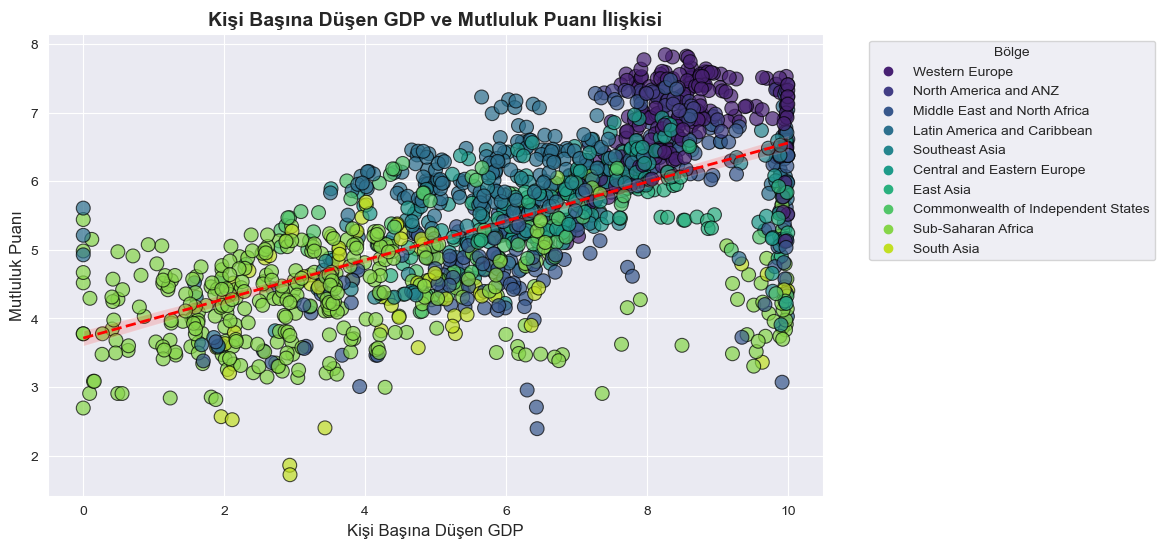

In [26]:
# Grafik tasarım stilini belirleyelim.
sns.set_style("darkgrid") 

# GDP per capita ve Mutluluk Skoru arasındaki ilişkiyi gösteren dağılım grafiği.
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    x=df["GDP per capita"], 
    y=df["Happiness score"], 
    hue=df["Regional indicator"],  # Bölgesel farklılıkları göstermek için renk kullanıyoruz.
    palette="viridis", 
    s=100,  # Noktaların büyüklüğü
    alpha=0.7, # Şeffaflık
    edgecolor="black"  # Kenar çizgisi rengi
)

# Regresyon çizgisi ekleyerek trendi gösteriyoruz.
sns.regplot(
    x=df["GDP per capita"], 
    y=df["Happiness score"], 
    scatter=False, 
    color="red", 
    line_kws={"linewidth": 2, "linestyle": "--"}  
)

plt.title("Kişi Başına Düşen GDP ve Mutluluk Puanı İlişkisi", fontsize=14, fontweight="bold")
plt.xlabel("Kişi Başına Düşen GDP", fontsize=12)
plt.ylabel("Mutluluk Puanı", fontsize=12)
plt.legend(title="Bölge", bbox_to_anchor=(1.05, 1), loc="upper left")


plt.show()

### 🔺 **GDP ve Mutluluk İlişkisi**

📈 **GDP arttıkça mutluluk puanının da arttığı gözlemleniyor.**  
Özellikle **Batı Avrupa** ve **Kuzey Amerika** gibi bölgelerde **GDP yüksek** ve **mutluluk puanı da genellikle yüksek**.  

🔻 **Güney Asya ve Sahra Altı Afrika** gibi bölgelerde ise **GDP düşük** ve **mutluluk puanı da daha düşük seviyelerde**.  
Bu durum, ekonomik refahın mutluluk üzerindeki etkisini gösteriyor. 💰➡️😊


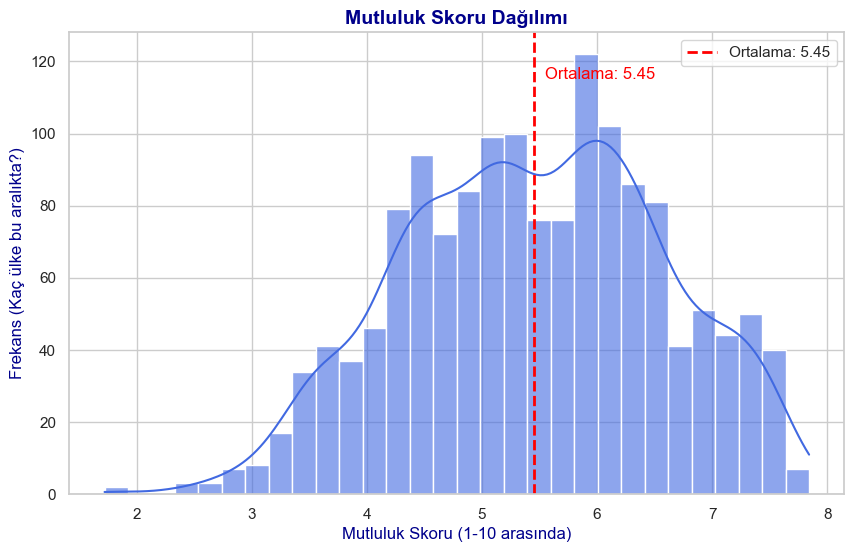

In [27]:
# Mutluluk Skoru dağılımını histogram ile gösterelim.
sns.set_theme(style="whitegrid", palette="Blues")
plt.figure(figsize=(10, 6))
sns.histplot(df["Happiness score"], bins=30, kde=True, color="royalblue", alpha=0.6)  # Saydamlık eklendi

plt.title("Mutluluk Skoru Dağılımı", fontsize=14, fontweight="bold", color="darkblue")
plt.xlabel("Mutluluk Skoru (1-10 arasında)", fontsize=12, color="darkblue")
plt.ylabel("Frekans (Kaç ülke bu aralıkta?)", fontsize=12, color="darkblue")

# Ortalama çizgisi ekleyelim.
mean_value = df["Happiness score"].mean()
plt.axvline(mean_value, color="red", linestyle="dashed", linewidth=2, label=f"Ortalama: {mean_value:.2f}")
plt.text(mean_value + 0.1, plt.ylim()[1] * 0.9, f"Ortalama: {mean_value:.2f}", color="red", fontsize=12)
plt.legend()
plt.show()

## 📊 Dünya Mutluluk Skoru Dağılımı

Bu grafik, dünya ülkelerinin mutluluk skorlarının nasıl dağıldığını anlamamıza yardımcı olur.  

### 📌 Genel Dağılım  
- **X ekseni**: Ülkelerin mutluluk skorlarını temsil eder (**1 ile 10 arasında bir değer**).  
- **Y ekseni**: Bu skor aralıklarında **kaç ülkenin bulunduğunu (frekans)** gösterir.  

### 🔴 Ortalama Mutluluk Skoru (Kırmızı Çizgi)  
- **Ortalama mutluluk skoru**: **5.45** olarak hesaplanmıştır.  
- Bu, dünya genelinde ülkelerin mutluluk skorlarının **çoğunlukla 5 ile 6 arasında yoğunlaştığını** gösteriyor.  


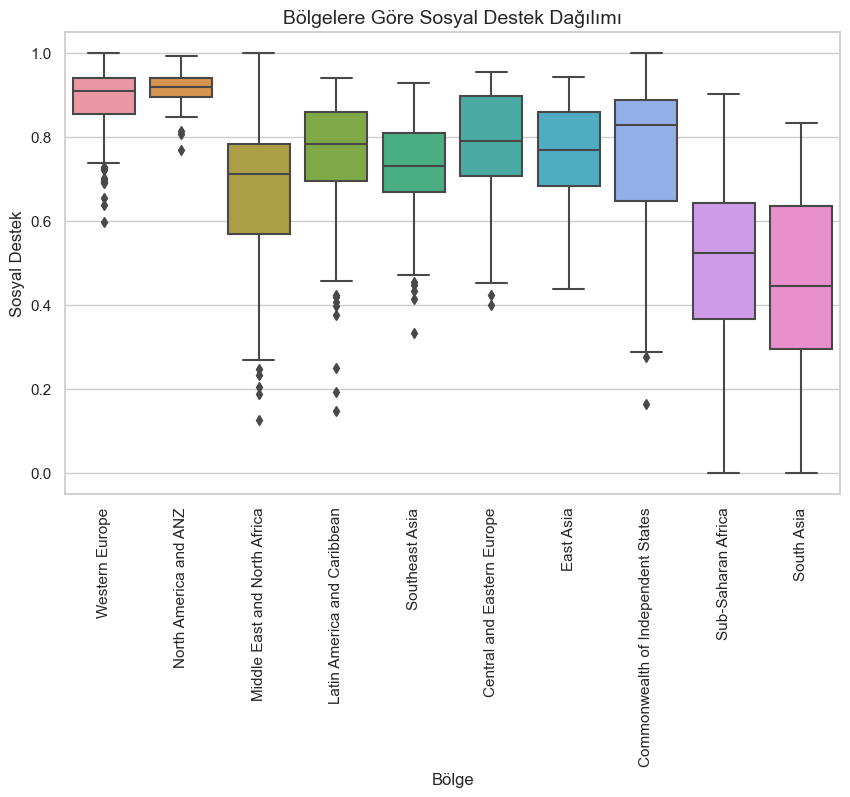

In [28]:
# Bölgelere göre sosyal destek dağılımı görselleştirme
plt.figure(figsize=(10, 6))
sns.boxplot(x="Regional indicator", y="Social support", data=df)
plt.xticks(rotation=90)
plt.title("Bölgelere Göre Sosyal Destek Dağılımı", fontsize=14)
plt.xlabel("Bölge", fontsize=12)
plt.ylabel("Sosyal Destek", fontsize=12)
plt.show()

## 🌍 Bölgesel Sosyal Destek Farklılıkları  

📌 **Batı Avrupa ve Kuzey Amerika** gibi bölgeler, **yüksek sosyal destek seviyelerine** sahiptir ve bu durum **ekonomik refahın etkisini** yansıtıyor olabilir.  

🔻 **Sahra Altı Afrika ve Güney Asya** gibi bölgelerde ise **sosyal destek genellikle düşük** ve **bölge içindeki ülkeler arasında büyük farklılıklar** görülmektedir.  

### 🌏 Bölgeler Arasındaki Farklılıklar  
- **Kültürel, ekonomik ve sosyal altyapı**, sosyal destek seviyelerinde önemli rol oynar.  
- Bu bölgelerdeki **sosyal destek politikalarının geliştirilmesi**, toplumsal refahı artırmak için kritik olabilir.  


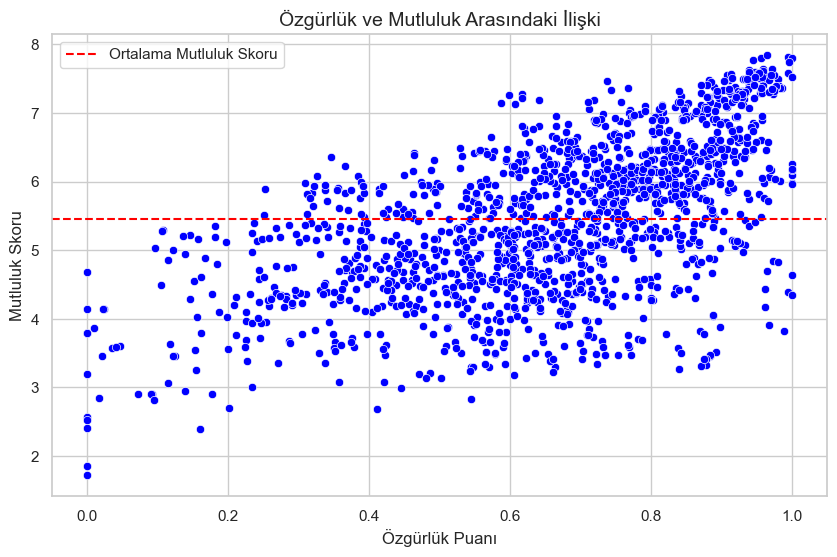

In [29]:
# Özgürlük puanı ile mutluluk skoru arasındaki ilişkiyi görselleştirme
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Freedom to make life choices"], y=df["Happiness score"], color="blue")
plt.title("Özgürlük ve Mutluluk Arasındaki İlişki", fontsize=14)
plt.xlabel("Özgürlük Puanı", fontsize=12)
plt.ylabel("Mutluluk Skoru", fontsize=12)
plt.axhline(df["Happiness score"].mean(), color="red", linestyle="dashed", label="Ortalama Mutluluk Skoru")
plt.legend()
plt.show()

## 🆓 Özgürlük ve Mutluluk İlişkisi  

Grafikte, **özgürlük puanının arttığı ülkelerde mutluluk skorlarının genelde daha yüksek olduğunu** görüyoruz.  
Bu, **özgürlük ile mutluluk arasında pozitif bir ilişki** olduğunu gösterebilir.  

### 🔴 Ortalama Mutluluk Skoru (Kırmızı Kesikli Çizgi)  
- **Dünya genelindeki ortalama mutluluk skorunu** ifade eder.  
- Grafikte birçok ülkenin bu çizginin üzerinde yer alması,  
  **özgürlük puanı yüksek olan ülkelerde mutluluğun da yüksek olduğunu destekleyebilir.**  

### 📌 Dikkat Çeken Ülkeler  
- **Özgürlük puanı yüksek olmasına rağmen mutluluk skorunun düşük olduğu ülkeler** mevcut.  
- Aynı şekilde, **özgürlük puanı düşük olup mutluluk skorunun yüksek olduğu ülkeler** de dikkat çekiyor.  
- Bu farklılıklar, **ekonomik, sosyal veya politik faktörler nedeniyle ortaya çıkıyor olabilir.**  


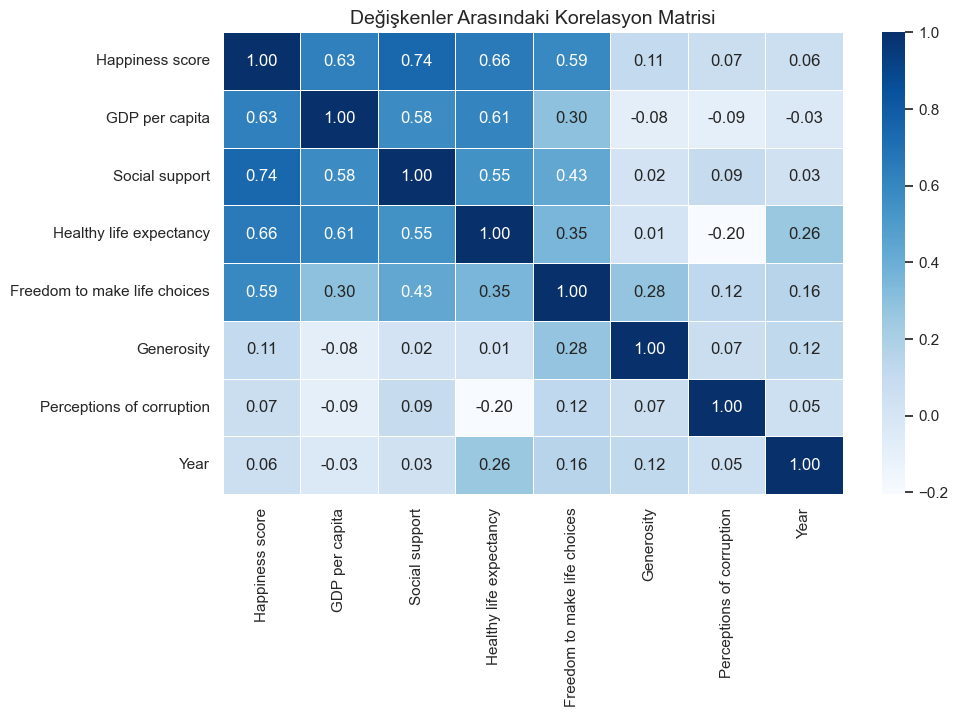

In [30]:
# Korelasyon matrisini gösteren ısı haritası oluşturalım.
numeric_data = df.select_dtypes(include=["number"])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.title("Değişkenler Arasındaki Korelasyon Matrisi", fontsize=14)
plt.show()

## 🔍 Mutluluğu En Çok Etkileyen Faktörler  

Buradan, **mutlulukla en güçlü pozitif korelasyona sahip faktörleri** görebiliriz:  

- **📌 Sosyal Destek** (**0.74**)  
- **💰 GSYH (Kişi Başına Düşen Gelir)** (**0.63**)  
- **🏥 Sağlıklı Yaşam Beklentisi** (**0.66**)  

### 📈 Genel Eğilim  
📊 **Ekonomik refah**, **sosyal destek** ve **sağlık seviyesi** arttıkça **mutluluk da artmaktadır**.  
Bu faktörler, bireylerin genel yaşam memnuniyeti üzerinde önemli bir etkiye sahiptir.  


In [31]:
# En güncel yıl verilerini kullanarak dünya mutluluk haritası oluşturalım.
latest_year = df["Year"].max()
df_latest = df[df["Year"] == latest_year]
fig = px.choropleth(
    df,
    locations="Country", 
    locationmode="country names", 
    color="Happiness score", 
    hover_name="Country", 
    color_continuous_scale="Viridis",
    title=f"{latest_year} Yılı Dünya Mutluluk Haritası"
)
fig.show()

## 🗺️ Mutluluk Skorlarının Coğrafi Dağılımı  

Bu harita, **ülkelerin mutluluk skorlarını coğrafi olarak görselleştiriyor**.  
**Renk skalası**, ülkeler arasındaki **mutluluk seviyesindeki farklılıkları kolayca algılamamızı** sağlıyor.  

### 📌 Genel Gözlemler  
- **Avrupa ülkeleri** genellikle **açık tonlarla** temsil ediliyor, bu da **yüksek mutluluk skorlarına** sahip olduklarını gösteriyor.  
- Buna karşılık, **bazı Afrika ve Orta Doğu ülkeleri** **daha koyu tonlarla** temsil ediliyor,  
  bu da **bu bölgelerdeki düşük mutluluk skorlarını** gösterebilir.  

### 🎯 Haritanın Önemi  
Bu harita, **politikacıların, araştırmacıların ve sosyal bilimcilerin**  
**hangi bölgelerde mutluluğu artırmaya yönelik politikalar geliştirmesi gerektiğini** belirlemelerine yardımcı olabilir.  


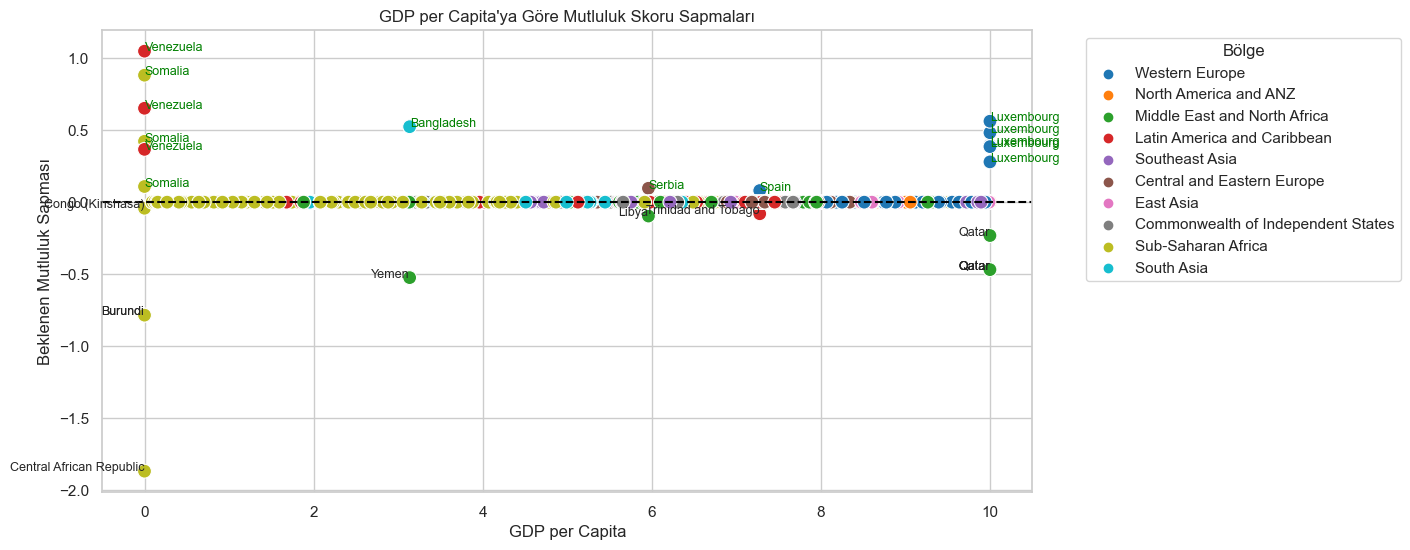

In [32]:
# GDP'ye göre mutluluk sapmalarını hesaplayıp görselleştirelim.
avg_happiness_by_gdp = df.groupby("GDP per capita")["Happiness score"].mean()
df["Happiness Deviation"] = df.apply(lambda row: row["Happiness score"] - avg_happiness_by_gdp[row["GDP per capita"]], axis=1)

low_happiness_countries = df[df["Happiness Deviation"] < 0]
high_happiness_countries = df[df["Happiness Deviation"] > 0]

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="GDP per capita", y="Happiness Deviation", hue="Regional indicator", s=100, palette="tab10")

for i, row in low_happiness_countries.iterrows():
    plt.text(row["GDP per capita"], row["Happiness Deviation"], row["Country"], fontsize=9, ha='right')

for i, row in high_happiness_countries.iterrows():
    plt.text(row["GDP per capita"], row["Happiness Deviation"], row["Country"], fontsize=9, ha='left', color='green')

plt.axhline(0, color='black', linestyle='--')

plt.title("GDP per Capita'ya Göre Mutluluk Skoru Sapmaları")
plt.xlabel("GDP per Capita")
plt.ylabel("Beklenen Mutluluk Sapması")
plt.legend(title="Bölge", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

## 📊 Ekonomik Güç ve Mutluluk Skorları Arasındaki İlişki  

Bu grafik, **ülkelerin ekonomik gücü (GSYİH)** ile **mutluluk skorları** arasındaki ilişkiyi ve sapmayı görselleştiriyor.  
Yani **ekonomik olarak güçlü olup beklenenden mutsuz** ya da **zayıf olup beklenenden mutlu** olan ülkeleri tanımlamamıza yardımcı oluyor.  

### 📌 Grafik Analizi  
- **Sıfır çizgisinin altında kalan ülkeler**, **ekonomik olarak güçlü olmalarına rağmen mutluluk seviyelerinin beklenenden düşük olduğunu** gösteriyor.  
- **Sıfır çizgisinin üstünde yer alan ülkeler**, **düşük ekonomik güce rağmen daha yüksek mutluluk skorlarına sahip**.  
  **Yeşil metinle etiketlenmiş ülkeler** bu gruba dahil.  

### 🌍 Önemli Çıkarımlar  
Bu analiz, **mutluluğun yalnızca ekonomik güçle değil, sosyal destek, özgürlük gibi başka faktörlerle de yakından ilişkili olduğunu** gösteriyor.  
**Politika yapıcılar**, **ekonomik büyümenin yanında sosyal refah ve bireysel mutluluk faktörlerine de önem vermeleri gerektiği** sonucuna ulaşmış oluruz.  


In [33]:
# Geçici olarak eklenen sapma sütununu kaldırıyoruz.
df = df.drop(columns=["Happiness Deviation"])

In [34]:
df.head()

Country     Regional indicator  Happiness score  GDP per capita  \
0  Switzerland         Western Europe            7.587         8.26132   
1      Iceland         Western Europe            7.561         7.70416   
2      Denmark         Western Europe            7.527         7.84114   
3       Norway         Western Europe            7.522         8.63100   
4       Canada  North America and ANZ            7.427         7.84595   

   Social support  Healthy life expectancy  Freedom to make life choices  \
0         0.96240                       73                       0.99379   
1         1.00000                       73                       0.93884   
2         0.97030                       70                       0.96962   
3         0.94917                       71                       1.00000   
4         0.94322                       71                       0.94511   

   Generosity  Perceptions of corruption  Year  
0     0.37289                    0.23941  2015  
1     0.54819                    0.74371  2015  
2     0.42894                    0.12382  2015  
3     0.43598                    0.33860  2015  
4     0.57560                    0.40285  2015

Linear Regression Modeli:
MAE: 0.4222
MSE: 0.2816
R^2 Skoru: 0.7486

Random Forest Modeli:
MAE: 0.3434
MSE: 0.2118
R^2 Skoru: 0.8109

Gradient Boosting Modeli:
MAE: 0.3638
MSE: 0.2273
R^2 Skoru: 0.7970



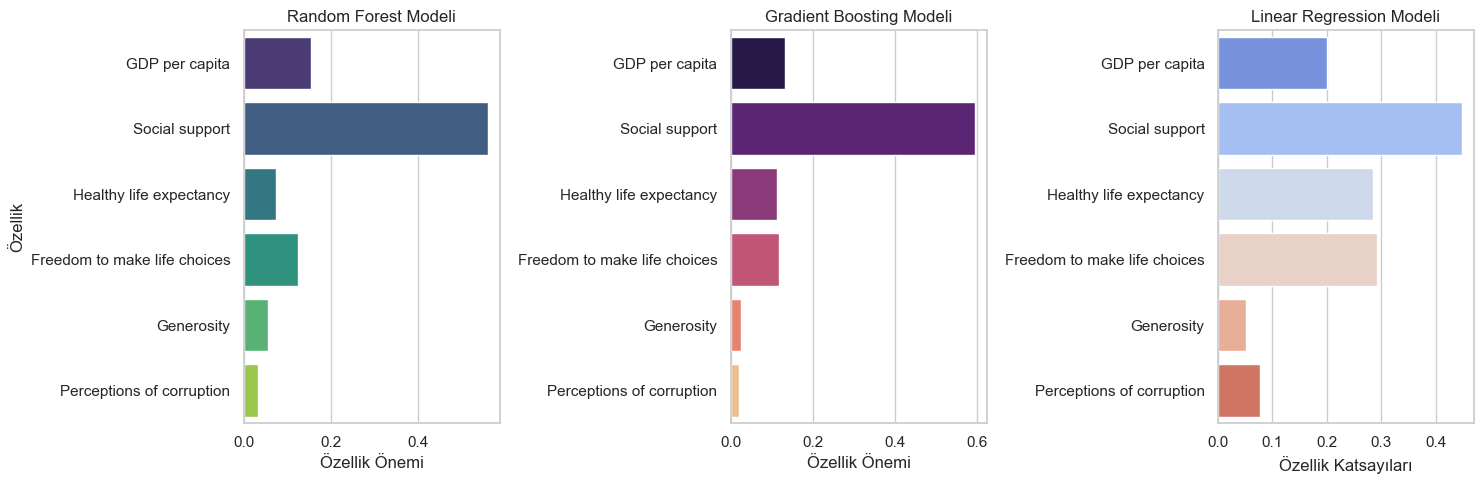

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#
# Gerekli sütunları seçme
columns = ["GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices", 
           "Generosity", "Perceptions of corruption", "Happiness score"]
df = df[columns].dropna()

# Bağımsız ve bağımlı değişkenleri ayırma
X = df.drop(columns=["Happiness score"])
y = df["Happiness score"]

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelleri tanımlama
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Modelleri eğitme ve değerlendirme
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"{name} Modeli:")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
    print(f"R^2 Skoru: {r2_score(y_test, y_pred):.4f}\n")

# Özellik önemlerini görselleştirme
rf_model = models["Random Forest"]
feature_importances = rf_model.feature_importances_
feature_names = X.columns

# Modellerin özellik önemlerini görselleştirme
plt.figure(figsize=(15, 5))

# Rastgele Orman Modeli
plt.subplot(1, 3, 1)
rf_model = models["Random Forest"]
sns.barplot(x=rf_model.feature_importances_, y=feature_names, palette="viridis")
plt.xlabel("Özellik Önemi")
plt.ylabel("Özellik")
plt.title("Random Forest Modeli")

# Gradient Boosting Modeli
plt.subplot(1, 3, 2)
gb_model = models["Gradient Boosting"]
sns.barplot(x=gb_model.feature_importances_, y=feature_names, palette="magma")
plt.xlabel("Özellik Önemi")
plt.ylabel("")
plt.title("Gradient Boosting Modeli")

# Linear Regression Modeli (Katsayılar)
plt.subplot(1, 3, 3)
lr_model = models["Linear Regression"]
sns.barplot(x=np.abs(lr_model.coef_), y=feature_names, palette="coolwarm")  # Mutlak değer alındı
plt.xlabel("Özellik Katsayıları")
plt.ylabel("")
plt.title("Linear Regression Modeli")

plt.tight_layout()
plt.show()


## 🔍 Model Performans Karşılaştırması  

Bu analizde üç farklı modeli test ettik:  
- **Doğrusal Regresyon (Linear Regression)**  
- **Rastgele Orman (Random Forest)**  
- **Gradient Boosting**  

Model performanslarını karşılaştırmak için üç temel metriğe baktık:  
- **R² Skoru**  
- **MAE (Ortalama Mutlak Hata)**  
- **MSE (Ortalama Kare Hatası)**  

### 📊 Sonuçlar
En iyi performansı **Rastgele Orman (Random Forest)** modeli gösterdi. Analizlerimizden çıkan bulgular:  
- **Kişi Başına Düşen Gelir (GSYİH)** ve **Sosyal Destek**, mutluluk skorunu en çok etkileyen faktörlerdir.  
- **Sağlıklı yaşam beklentisi** de mutluluk seviyesinde önemli bir rol oynamaktadır.  
- **Yolsuzluk algısı yüksek olan ülkelerde**, mutluluk seviyesi genellikle daha düşüktür.  

Bu sonuçlar doğrultusunda, **politika yapıcılar**, **ekonomik büyüme**, **sosyal güvenlik sistemleri** ve **sağlık yatırımlarına** odaklanarak toplumsal mutluluğu artırabilirler.  

### 📈 Performans Metrikleri

| Model               | MAE   | MSE   | R² Skoru |
|---------------------|-------|-------|----------|
| **Linear Regression**| 0.4222| 0.2816| 0.7486   |
| **Random Forest**    | 0.3434| 0.2118| 0.8109   |
| **Gradient Boosting**| 0.3638| 0.2273| 0.7970   |

#### 📌 Çıkarımlar:
- **R² Skoru**: Random Forest modeli, **%81**’lik bir açıklama sağlıyor, yani bağımsız değişkenler mutluluk skorunun yaklaşık **%81’ini** açıklayabiliyor.  
- **En düşük MAE ve MSE** değerleri **Random Forest** modelinde bulunuyor, bu da modelin hata oranının en düşük olduğunu gösteriyor.  
- **Gradient Boosting** modeli başarılıydı ancak **Random Forest** kadar iyi bir sonuç veremedi.  
- **Doğrusal Regresyon** (Linear Regression) modeli en düşük performansa sahipti ve **daha düşük bir R² skoru** (0.74) elde etti.  

### 🔑 Özellik Önemleri ve Model Yorumları
Şimdi, modellerin hangi değişkenlere daha fazla ağırlık verdiğini inceleyelim:  
- **Rastgele Orman ve Gradient Boosting** modellerinde en önemli değişkenler:  
  - **GDP per capita** (kişi başına düşen gelir)  
  - **Social support** (sosyal destek)  
  - **Healthy life expectancy** (sağlıklı yaşam süresi)  

- **En az etkili değişken**:  
  - **Perceptions of corruption** (yolsuzluk algısı), modelde diğerlerine göre daha az önem taşıyor gibi görünüyor.  

- **Doğrusal Regresyon** modelinde ise katsayılar, değişkenlerin mutluluk skoruna nasıl etki ettiğini gösterdi. Ancak doğrusal model olduğu için bu etkileşimler daha sınırlı olabilir.  
